In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#1.0 OBTAIN INITIAL FILES
    #1.01 Carpetas de Investigación
        #1.01.01 Download file from the following url
        #https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/download/?format=csv&timezone=America/Mexico_City&use_labels_for_header=true
    
        #1.01.02 Save as "Carpetas de Investigación PGJ CDMX.csv" in current folder
    
    #1.02 Alcaldías in CDMX
    
 

In [4]:
#2. UPLOAD IN PYTHON FILES

#2.01 Carpetas de Investigación (PGJ Files)
PGJ_input=pd.read_csv("Carpetas de Investigación PGJ CDMX.csv",sep=";")
#PGJ_input.head()

#2.02 Alcaldías (Town Halls)
Alcaldias_input=pd.read_csv("Alcaldías.csv",sep=";")
#Alcaldias_input

#2.03 Budget information
#2.04 Demographic information
#2.05 Crime Clasification
PGJ_Class=pd.read_csv("Clasificación Delitos.csv")
PGJ_Class

,delito,Violencia,Tipo Daño
0,ABUSO DE AUTORIDAD,No Violento,Personal
1,ABUSO DE CONFIANZA,No Violento,Personal
2,ABUSO SEXUAL,Violento,Personal
3,AMENAZAS,Violento,Personal
4,DAÑO EN PROPIEDAD AJENA CULPOSA,No Violento,Material
5,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO ...,No Violento,Material
6,DAÑO EN PROPIEDAD AJENA INTENCIONAL,No Violento,Material
7,DENUNCIA DE HECHOS,No Violento,Otro
8,DESPOJO,No Violento,Material
9,FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...,No Violento,Material


In [5]:
# 3.0 Adjust the Town Halls names (upper cases, no accents)

#3.01 From Alcaldias file.
    #3.01.02 Define variable alcaldias in order to have a list of all the "Alcaldias" in CDMX
alcaldias=Alcaldias_input["NOMBRE"]
alcaldias=alcaldias.str.replace("Á","A")
alcaldias=alcaldias.str.replace("á","a")
alcaldias=alcaldias.str.replace("É","E")
alcaldias=alcaldias.str.replace("é","e")
alcaldias=alcaldias.str.replace("Í","I")
alcaldias=alcaldias.str.replace("í","i")
alcaldias=alcaldias.str.replace("Ó","O")
alcaldias=alcaldias.str.replace("ó","o")
alcaldias=alcaldias.str.replace("Ú","u")
alcaldias=alcaldias.str.replace("ú","u")
alcaldias=alcaldias.str.replace(".","")
alcaldias = [alcaldia.upper() for alcaldia in alcaldias]
alcaldias

#3.02 From Budget File

#3.03 From Dempographics file

['TLALPAN',
 'TLAHUAC',
 'VENUSTIANO CARRANZA',
 'CUAUHTEMOC',
 'IZTAPALAPA',
 'AZCAPOTZALCO',
 'BENITO JUAREZ',
 'CUAJIMALPA DE MORELOS',
 'IZTACALCO',
 'GUSTAVO A MADERO',
 'MIGUEL HIDALGO',
 'LA MAGDALENA CONTRERAS',
 'COYOACAN',
 'MILPA ALTA',
 'ALVARO OBREGON',
 'XOCHIMILCO']

In [6]:
#4.0 Filter only the data needed

#4.01 Alcaldias in CMX
    #4.01.01 From the PGJ files
PGJ_alcaldias=PGJ_input.loc[PGJ_input["alcaldia_hechos"].isin(alcaldias),:]
#PGJ_alcaldias

    #4.01.02 From the Budget file

    #4.01.03 from the Demographics file

In [32]:
# 4.02 Years that will be included in the analysis of crime rates, for the rest of the information
Primer_año=2016
Ultimo_año=2019

# 4.02.01 The historic data will only be considered in the PGJ files to review historic changes in the crime rates
PGJ_Hist=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]>Primer_año-1,:]
PGJ_Hist=PGJ_Hist.loc[PGJ_Hist["año_hechos"]<Ultimo_año+1,:]
#PGJ_Hist.head()

#4.02.02 The budget used will be last year's Budget in order to have full year of Crime Vs Full budget usage
#4.02.03 The Demographic information will be from the last census registered


In [8]:
#5.0 Define the Crimes that will be tracked to narrow the scope

#5.01 For these exercise, we will only review the Top 30 crimes from 2018
PGJ_2018=PGJ_alcaldias.loc[PGJ_alcaldias["año_hechos"]==2018,:]
PGJ_Top30_2018=PGJ_2018.groupby(["delito"],as_index=False).count()
PGJ_Top30_2018=(PGJ_Top30_2018.sort_values(by ="año_hechos",ascending=False)).head(30)
PGJ_Top30_2018=PGJ_Top30_2018["delito"]
PGJ_Top30_2018=PGJ_Top30_2018.tolist()
#PGJ_Top30_2018

In [9]:
#6.0 Filter only the crimes included in the Top 30 from 2018
PGJ_Top_Hist=PGJ_Hist.loc[PGJ_Hist["delito"].isin(PGJ_Top30_2018),:]

#PGJ_Top_Hist["delito"].unique() #--> Should give the Top 30 crimes in 2018
#PGJ_Top_Hist["año_hechos"].unique() #--> Should give the years from Primer_año to Ultimo_año

In [10]:
#7.0 HISTORIC INFORMATION FROM CRIMES
#7.01 Create table with total crimes for CDMX (for the Top 30 2018 Crimes)
#7.01.01 Create Graph for Total Crimes for CDMX

In [11]:
#7.02.01 Create table with historic evolution of each of the Top 30 2018 Crimes
#7.02.02 Create Graph for the historic evolution of each of the Top 30 2018 Crimes

In [12]:
#7.03.01 Create table for Total crimes evolution for each Alcaldia
#7.03.02 Create Graph for Total crimes evolution for each Alcaldia

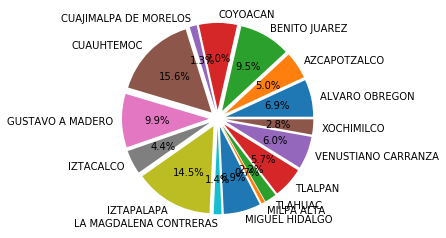

In [13]:
#8.0 2018 INFORMATION BY ALCALDIA

#8.01 Create Table with total crimes for Top 30 2018 Crimes for each Alcaldia
PGJ_Top_2018 =PGJ_Top_Hist.loc[PGJ_Top_Hist["año_hechos"]==2018,:]
PGJ_Top_2018=PGJ_Top_2018.merge(PGJ_Class,on=["delito"])
Total_Delitos_Alcaldias_2018=PGJ_Top_2018.groupby("alcaldia_hechos",as_index=False).count()
#Total_Delitos_Alcaldias_2018=Total_Delitos_Alcaldias_2018.loc[:,["delito"]]
#Total_Delitos_Alcaldias_2018

#8.02 Create Pie for total crimes for Top 30 2018 Crimes by Alcaldia

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
pie_Alcaldias = plt.pie(Total_Delitos_Alcaldias_2018["delito"],
                labels=Total_Delitos_Alcaldias_2018["alcaldia_hechos"],
                explode=explode,autopct="%1.1f%%",
                radius=1)
#PGJ_Top_2018

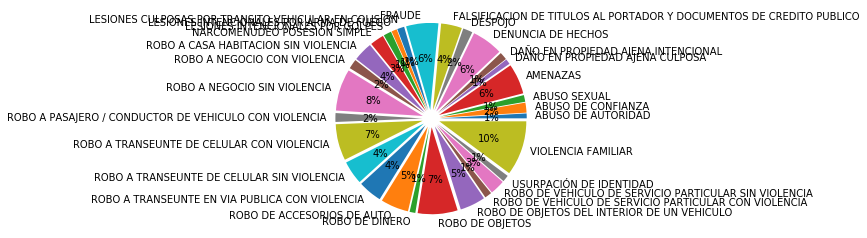

In [20]:
#9.0 2018 INFORMATION BY CRIME

#8.01 Create Table with total crimes for Top 30 2018 Crimes for each Alcaldia
Total_Delitos_2018=PGJ_Top_2018.groupby("delito",as_index=False).count()
#Total_Delitos_2018
#export_csv=Total_Delitos_2018.to_csv("Total_Delitos_2018.csv")

#8.02 Create Pie for total crimes for Top 30 2018 Crimes by Alcaldia

explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
         0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,
         0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
pie_Delitos = plt.pie(Total_Delitos_2018["alcaldia_hechos"],
                labels=Total_Delitos_2018["delito"],
                explode=explode,
                autopct="%1.f%%",
                radius=1)

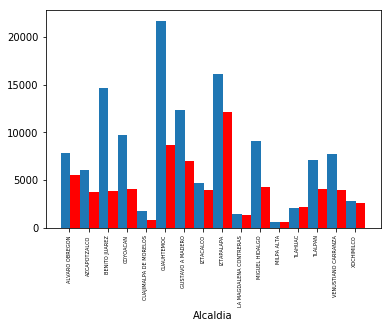

In [30]:
Total_Violencia_2018=PGJ_Top_2018.groupby(["alcaldia_hechos","Violencia"],as_index=False).count()
ConViolencia_2018=Total_Violencia_2018.loc[Total_Violencia_2018["Violencia"]=="Violento",:]
SinViolencia_2018=Total_Violencia_2018.loc[Total_Violencia_2018["Violencia"]=="No Violento",:]

fig, ax = plt.subplots()

x_axis=np.arange(0,16)

r1 = np.arange(0,16)
r2 = [x + .5 for x in r1]


SVplot=ax.bar(r1,SinViolencia_2018["delito"],width=.5)
Vplot = ax.bar(r2,ConViolencia_2018["delito"],width=.5,color="red")

plt.xlabel("Alcaldia")
tick_locations=[value + .2 for value in x_axis]
plt.xticks(tick_locations,ConViolencia_2018["alcaldia_hechos"],rotation="vertical",fontsize=5)
plt.show()

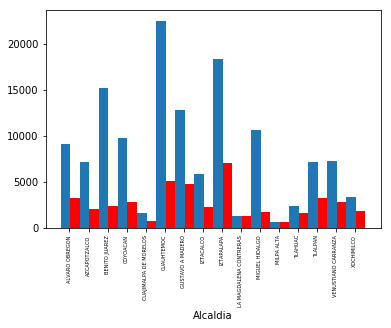

In [34]:
TipoDaño_2018=PGJ_Top_2018.groupby(["alcaldia_hechos","Tipo Daño"],as_index=False).count()
Material_2018=TipoDaño_2018.loc[TipoDaño_2018["Tipo Daño"]=="Material",:]
Personal_2018=TipoDaño_2018.loc[TipoDaño_2018["Tipo Daño"]=="Personal",:]

fig, ax = plt.subplots()

x_axis=np.arange(0,16)

r1 = np.arange(0,16)
r2 = [x + .5 for x in r1]


Matplot=ax.bar(r1,Material_2018["delito"],width=.5)
Perplot = ax.bar(r2,Personal_2018["delito"],width=.5,color="red")

plt.xlabel("Alcaldia")
tick_locations=[value + .2 for value in x_axis]
plt.xticks(tick_locations,Personal_2018["alcaldia_hechos"],rotation="vertical",fontsize=5)
plt.show()